In [1]:
import requests
import numpy as np
import pandas as pd
from tqdm import tqdm
import osmnx as ox

In [2]:
from utils.utils import in_box, metres_to_dist
from utils import gpx_converter #modified to save trackno
from utils.interpolate import batch_geo_interpolate_df

In [4]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; rv:55.0) Gecko/20100101 Firefox/55.0',}

# Row data

## Download Cambridgeshire ROW data

In [18]:
row_response = requests.get("https://www.rowmaps.com/getgpx.php", params={"l": "CB", "w": "no"}, headers=headers)

In [19]:
with open("data/row/row.gpx", "wb") as f:
    f.write(row_response.content)

## Convert ROW to csv

In [5]:
gpx_converter.Converter(input_file='data/row/row.gpx').gpx_to_csv(output_file='data/row/row_raw.csv')

True

## Interpolate and save

In [3]:
row_raw_df = pd.read_csv("data/row/row_raw.csv")

In [4]:
row_df = batch_geo_interpolate_df(row_raw_df, dist_m=20)

100%|██████████| 4601/4601 [00:27<00:00, 169.17it/s]


In [5]:
print(len(row_raw_df), len(row_df))

98169 199155


In [6]:
row_df.to_csv("data/row/row.csv", index=False)

In [3]:
import plotly.express as px
import haversine

In [ ]:
px.scatter_geo(test,lat='latitude',lon='longitude')

In [17]:
haversine.haversine(row_tracks_dfs[0].to_numpy()[1,0:2], row_tracks_dfs[0].to_numpy()[2,0:2], unit="m")

15.844476970924019

## Get arbitrary bbox to work with, within ROW boundaries

In [27]:
from scipy import spatial

In [23]:
row_df = pd.read_csv("data/row/row_raw.csv")
row_arr = row_df[["longitude", "latitude"]].to_numpy()
print(row_arr.shape)

(98169, 2)


In [28]:
hull_points = row_arr[spatial.ConvexHull(row_arr, qhull_options="Qt").vertices, :]
bbox = [*(row_arr.min(axis=0)), *(row_arr.max(axis=0))]
hw = 0.05
bbox = [(bbox[2]+bbox[0])/2-hw, (bbox[3]+bbox[1])/2-hw, (bbox[2]+bbox[0])/2+hw, (bbox[3]+bbox[1])/2+hw]

In [29]:
print(bbox)
np.savetxt("data/bbox.csv", bbox, delimiter=",")

[-0.04285499999999999, 52.32761000000001, 0.057145000000000015, 52.42761]


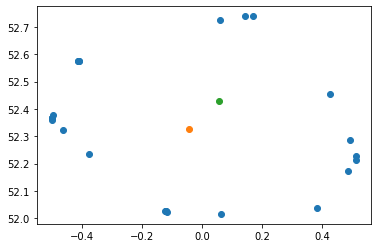

In [30]:
import matplotlib.pyplot as plt
l,b,r,t = bbox
plt.scatter(hull_points[:,0], hull_points[:,1])
plt.scatter(l,b)
plt.scatter(r,t)

## Get ROW within bbox

In [18]:
row_df = pd.read_csv("data/row/row.csv")
bbox = np.loadtxt("data/bbox.csv", delimiter=",", dtype=np.float32)

In [19]:
box_row_df = row_df.loc[in_box(row_df["latitude"], row_df["longitude"], bbox=bbox)]

In [20]:
box_row_df.to_csv("data/row/row_bbox.csv", index=False)

# Public GPS data

## Download subset of East Anglia GPS data

In [62]:
!curl -o data/public/public_east_of_england.tar.xz http://zverik.openstreetmap.ru/gps/files/extracts/europe/great_britain/east-of-england.tar.xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  173M    0  267k    0     0   461k      0  0:06:26 --:--:--  0:06:26  462k
  1  173M    1 3070k    0     0  1899k      0  0:01:33  0:00:01  0:01:32 1902k
  5  173M    5 10.2M    0     0  4049k      0  0:00:43  0:00:02  0:00:41 4052k
  9  173M    9 16.2M    0     0  4654k      0  0:00:38  0:00:03  0:00:35 4656k
 13  173M   13 23.6M    0     0  5280k      0  0:00:33  0:00:04  0:00:29 5282k
 15  173M   15 27.4M    0     0  5033k      0  0:00:35  0:00:05  0:00:30 5565k
 18  173M   18 32.0M    0     0  4993k      0  0:00:35  0:00:06  0:00:29 5999k
 19  173M   19 34.4M    0     0  4660k      0  0:00:38  0:00:07  0:00:31 4977k
 21  173M   21 37.4M    0     0  4470k      0  0:00:39  0:00:08  0:00:31 4340k
 23  173M   23 40.7M    0     0  4361k      0  0:00

In [63]:
!tar -xvf data/public/public_east_of_england.tar.xz -C data/public

gpx-planet-2013-04-09/metadata.xml
gpx-planet-2013-04-09/identifiable/001/005/001005365.gpx
gpx-planet-2013-04-09/identifiable/001/005/001005323.gpx
gpx-planet-2013-04-09/identifiable/001/005/001005355.gpx
gpx-planet-2013-04-09/identifiable/001/005/001005312.gpx
gpx-planet-2013-04-09/identifiable/001/005/001005311.gpx
gpx-planet-2013-04-09/identifiable/001/005/001005219.gpx
gpx-planet-2013-04-09/identifiable/001/005/001005335.gpx
gpx-planet-2013-04-09/identifiable/001/005/001005405.gpx
gpx-planet-2013-04-09/identifiable/001/005/001005261.gpx
gpx-planet-2013-04-09/identifiable/001/005/001005974.gpx
gpx-planet-2013-04-09/identifiable/001/005/001005645.gpx
gpx-planet-2013-04-09/identifiable/001/005/001005643.gpx
gpx-planet-2013-04-09/identifiable/001/273/001273910.gpx
gpx-planet-2013-04-09/identifiable/001/273/001273447.gpx
gpx-planet-2013-04-09/identifiable/001/273/001273911.gpx
gpx-planet-2013-04-09/identifiable/001/273/001273557.gpx
gpx-planet-2013-04-09/identifiable/001/273/001273567.

In [66]:
!rm data/public/public_east_of_england.tar.xz

In [7]:
from pathlib import Path

In [8]:
all_gps_paths = list(Path("data/public/gpx-planet-2013-04-09").rglob("*.gpx"))

In [9]:
len(all_gps_paths)

8829

In [12]:
frames = []
for idx,gps_path in tqdm(enumerate(all_gps_paths)):
    df = gpx_converter.Converter(input_file=gps_path).gpx_to_dataframe(i=idx)
    df = df[["latitude", "longitude", "trackid"]]
    df = df.loc[(df[["latitude", "longitude"]] != 0).all(axis=1), :] #TODO: only check in lat and lon, not trackid
    frames.append(df)

8829it [1:09:12,  2.13it/s]


In [13]:
all_gps_raw_df = pd.concat(frames, ignore_index=True)

In [15]:
all_gps_raw_df.to_csv("data/public/public_gps_traces_raw.csv", index=False)

## Get GPS traces within bbox

In [18]:
bbox = np.loadtxt("data/bbox.csv", delimiter=",", dtype=np.float32)

In [101]:
all_gps_raw_df = pd.read_csv("data/public/public_gps_traces_raw.csv")

In [20]:
box_gps_df = all_gps_raw_df.loc[in_box(all_gps_raw_df["latitude"], all_gps_raw_df["longitude"], bbox=bbox)]

In [21]:
box_gps_df.to_csv("data/public/public_gps_traces_raw_bbox.csv", index=False)

In [ ]:
#cut interpolation for inter-track points with long separation

In [ ]:
#better interpolation for traces that have gone out of bbox and back in

In [ ]:
G = ox.load_graphml("data/osmnx/graph.graphml")

In [29]:
len(all_gps_df)

132098

In [36]:
ts = all_gps_df["trackid"].unique()

In [43]:
all_gps_df["trackid"] 

0          673
1          673
2          673
3          673
4          673
          ... 
132093    8504
132094    8504
132095    8504
132096    8504
132097    8504
Name: trackid, Length: 132098, dtype: int64

In [60]:
ts[12]

2017

In [67]:
test = box_gps_df[box_gps_df["trackid"] == ts[12]]

In [52]:
test = all_gps_df[all_gps_df["trackid"].isin(ts[].tolist())]

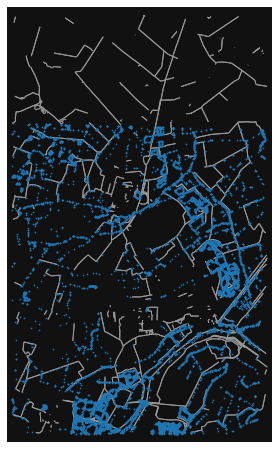

In [68]:
fig, ax = ox.plot_graph(G, node_size=0, show=False, close=False)
ax.scatter(test["longitude"], test["latitude"], s=2, marker='.')

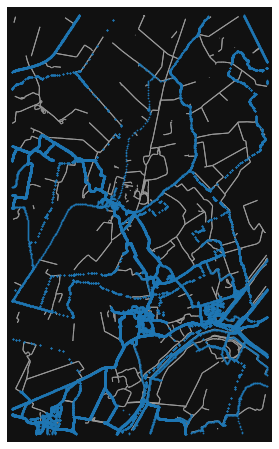

In [66]:
fig, ax = ox.plot_graph(G, node_size=0, show=False, close=False)
ax.scatter(test["longitude"], test["latitude"], s=2, marker='.')

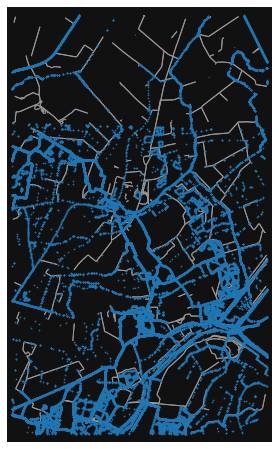

In [64]:
fig, ax = ox.plot_graph(G, node_size=0, show=False, close=False)
ax.scatter(test["longitude"], test["latitude"], s=2, marker='.')

In [81]:
test = box_gps_df[box_gps_df["trackid"] == ts[12]]

In [84]:
from haversine import haversine, haversine_vector

In [82]:
a = [haversine(test.iloc[i, 0:2].to_numpy(), test.iloc[i+1, 0:2].to_numpy() , "m") for i in range(len(test) - 1)]

In [86]:
np.array([1,2,3,4,5])[1:]

array([2, 3, 4, 5])

In [88]:
a = haversine_vector(test.iloc[:-1, 0:2].to_numpy(), test.iloc[1:, 0:2].to_numpy(), "m")

In [75]:
import matplotlib.pyplot as plt

(0.0, 1000.0)

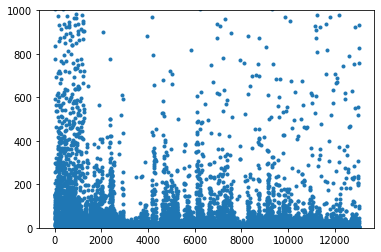

In [92]:
plt.plot(a, '.')
plt.ylim([0,1000])

In [ ]:
def is_clean_track(df):
    return True

In [ ]:
def in_bbox_truncate_by_edge(df):
    return in_box(d["latitude"], d["longitude"], bbox=bbox).any()

In [ ]:
def filter_tracks(df):
    return df if in_bbox_truncate_by_edge(df) and is_clean_track(df) else None

In [131]:
box_gps_temp_df = all_gps_raw_df.groupby("trackid", as_index=False).apply(filter_tracks)

latitude  longitude  trackid
673  1996956   52.329683   0.064201      673
     1996957   52.329791   0.064266      673
     1996958   52.329876   0.064287      673
     1996959   52.329962   0.064330      673
     1996960   52.330005   0.064352      673
...                  ...        ...      ...
8504 33014457  52.900625   0.493593     8504
     33014458  52.900622   0.493587     8504
     33014459  52.900617   0.493583     8504
     33014460  52.900612   0.493575     8504
     33014461  52.900605   0.493585     8504

[680952 rows x 3 columns]

In [ ]:
box_gps_temp_df.to_csv("data/public/public_gps_traces_raw_bbox_temp.csv", index=False)

## Interpolate GPS traces

In [22]:
all_gps_raw_df = pd.read_csv("data/public/public_gps_traces_raw_bbox_temp.csv")

In [23]:
all_gps_df = batch_geo_interpolate_df(all_gps_raw_df, dist_m=20)


100%|██████████| 64/64 [00:36<00:00,  1.76it/s]


In [24]:
print(len(all_gps_raw_df), len(all_gps_df))

76565 132098


In [25]:
all_gps_df.to_csv("data/public/public_gps_traces_bbox_temp.csv", index=False)

## Re bbox

In [ ]:
bbox = np.loadtxt("data/bbox.csv", delimiter=",", dtype=np.float32)

In [ ]:
all_gps_df = pd.read_csv("data/public/public_gps_traces_bbox_temp.csv")

In [ ]:
box_gps_df = all_gps_raw_df.loc[in_box(all_gps_df["latitude"], all_gps_df["longitude"], bbox=bbox)]

In [ ]:
box_gps_df.to_csv("data/public/public_gps_traces_bbox.csv", index=False)

# OSM road data 

## Download OSM data from bbox and save graph

In [2]:
import osmnx as ox

In [3]:
bbox = np.loadtxt("data/bbox.csv", delimiter=",", dtype=np.float32)

In [4]:
%time
G = ox.graph_from_bbox(bbox[3], bbox[1], bbox[2], bbox[0], 
                       custom_filter='["highway"~"footway|cycleway|bridleway|path|track"]', 
                       retain_all=True, simplify=False)

Wall time: 0 ns


In [5]:
len(G)

3725

In [6]:
filepath = "data/osmnx/graph.graphml"
ox.save_graphml(G, filepath)

In [7]:
G = ox.load_graphml(filepath)

In [8]:
np.set_printoptions(suppress=True)

In [9]:
print(bbox)

[-0.042855 52.32761   0.057145 52.42761 ]


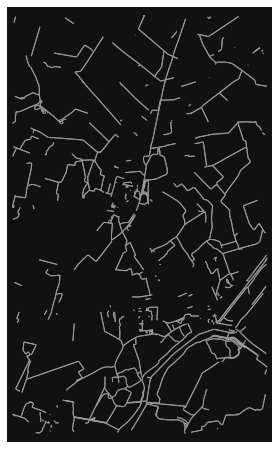

In [10]:
fig, ax = ox.plot_graph(G, node_size=0)